In [56]:
import argparse
import numpy as np
import os
import tabulate
import torch
import torch.nn.functional as F

import data
import models
import curves
import utils

import pickle

In [57]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from scipy.stats import norm

43


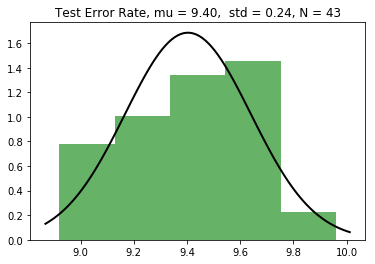

In [70]:
statistic = pickle.load(open("stats/point_stat.p", "rb"))
statistic = np.array(statistic)


print(len(statistic))

# Fit a normal distribution to the data:
x = 100 - statistic[:, -1]
mu, std = norm.fit(x)

# Plot the histogram.
plt.hist(x, bins=5, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Test Error Rate, mu = %.2f,  std = %.2f, N = %.f" % (mu, std, len(statistic))
plt.title(title)

plt.show()

In [59]:
statistic = pickle.load(open("stats/middle_point_stat.p", "rb"))

903


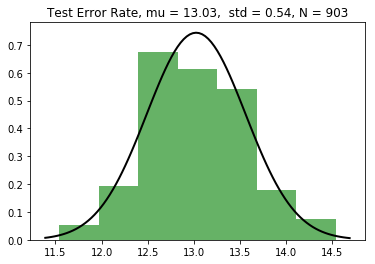

In [76]:
statistic = pickle.load(open("stats/middle_point_stat.p", "rb"))
statistic = [s[1:] for s in statistic]
statistic = np.array(statistic)

print(len(statistic))

# Fit a normal distribution to the data:
# x = statistic[:, 0]
x = 100 - statistic[:, -1]
mu, std = norm.fit(x)

# Plot the histogram.
plt.hist(x, bins=7, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Test Error Rate, mu = %.2f,  std = %.2f, N = %.f" % (mu, std, len(statistic))
plt.title(title)

plt.show()

In [77]:
43*42/2

903.0

40


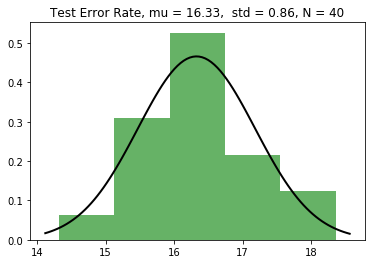

In [78]:
statistic = pickle.load(open("stats/middle_point_stat_3.p", "rb"))
statistic = [s[1:] for s in statistic]
statistic = np.array(statistic)


print(len(statistic))
# Fit a normal distribution to the data:
x = 100 - statistic[:, -1]
mu, std = norm.fit(x)

# Plot the histogram.
plt.hist(x, bins=5, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Test Error Rate, mu = %.2f,  std = %.2f, N = %.f" % (mu, std, len(statistic))
plt.title(title)

plt.show()

$$  A $$

In [2]:
# parser = argparse.ArgumentParser(description='Computes values for plane visualization')
# parser.add_argument('--dir', type=str, default='/tmp/plane', metavar='DIR',
#                     help='training directory (default: /tmp/plane)')

# parser.add_argument('--grid_points', type=int, default=21, metavar='N',
#                     help='number of points in the grid (default: 21)')
# parser.add_argument('--margin_left', type=float, default=0.2, metavar='M',
#                     help='left margin (default: 0.2)')
# parser.add_argument('--margin_right', type=float, default=0.2, metavar='M',
#                     help='right margin (default: 0.2)')
# parser.add_argument('--margin_bottom', type=float, default=0.2, metavar='M',
#                     help='bottom margin (default: 0.)')
# parser.add_argument('--margin_top', type=float, default=0.2, metavar='M',
#                     help='top margin (default: 0.2)')

# parser.add_argument('--curve_points', type=int, default=61, metavar='N',
#                     help='number of points on the curve (default: 61)')

# parser.add_argument('--dataset', type=str, default='CIFAR10', metavar='DATASET',
#                     help='dataset name (default: CIFAR10)')
# parser.add_argument('--use_test', action='store_true',
#                     help='switches between validation and test set (default: validation)')
# parser.add_argument('--transform', type=str, default='VGG', metavar='TRANSFORM',
#                     help='transform name (default: VGG)')
# parser.add_argument('--data_path', type=str, default=None, metavar='PATH',
#                     help='path to datasets location (default: None)')
# parser.add_argument('--batch_size', type=int, default=128, metavar='N',
#                     help='input batch size (default: 128)')
# parser.add_argument('--num_workers', type=int, default=4, metavar='N',
#                     help='number of workers (default: 4)')

# parser.add_argument('--model', type=str, default=None, metavar='MODEL',
#                     help='model name (default: None)')
# parser.add_argument('--curve', type=str, default=None, metavar='CURVE',
#                     help='curve type to use (default: None)')
# parser.add_argument('--num_bends', type=int, default=3, metavar='N',
#                     help='number of curve bends (default: 3)')

# parser.add_argument('--ckpt', type=str, default=None, metavar='CKPT',
#                     help='checkpoint to eval (default: None)')

# parser.add_argument('--wd', type=float, default=1e-4, metavar='WD',
#                     help='weight decay (default: 1e-4)')

# args = parser.parse_args()


In [14]:
loaders, num_classes = data.loaders(
    "CIFAR10",
    "data",
    128,
    1,
    "VGG",
    False)

architecture = getattr(models, "VGG16")
curve = getattr(curves, 'PolyChain')

model = curves.CurveNet(
            10,
            curve,
            architecture.curve,
            3,
            True,
            True,
            architecture_kwargs=architecture.kwargs,
            )

base_model = architecture.base(10, **architecture.kwargs)


Files already downloaded and verified
Using train (45000) + validation (5000)
Files already downloaded and verified


In [15]:
utils.check_bn(base_model)

False

In [4]:
has_bn = utils.check_bn(model)
test_res = {'loss': None, 'accuracy': None, 'nll': None}

In [8]:
criterion = F.cross_entropy
regularizer = utils.l2_regularizer(1e-4)

checkpoint = torch.load(args.ckpt)
curve_model.load_state_dict(checkpoint['model_state'])

In [9]:
train_res = utils.test(loaders['train'], model, criterion, regularizer)
test_res = utils.test(loaders['test'], model, criterion, regularizer)

values = [epoch, lr, train_res['loss'], train_res['accuracy'], test_res['nll'],
          test_res['accuracy'], time_ep]

table = tabulate.tabulate([values], columns, tablefmt='simple', floatfmt='9.4f')
if epoch % 40 == 1 or epoch == start_epoch:
    table = table.split('\n')
    table = '\n'.join([table[1]] + table)
else:
    table = table.split('\n')[2]
print(table)

RuntimeError: torch.cuda.FloatTensor is not enabled.

In [11]:
str(53)

'53'

In [12]:
import pickle

In [13]:
2!=3

True

In [ ]:
architecture = getattr(models, args.model)
curve = getattr(curves, args.curve)

curve_model = curves.CurveNet(
    num_classes,
    curve,
    architecture.curve,
    args.num_bends,
    architecture_kwargs=architecture.kwargs,
)
curve_model.cuda()

checkpoint = torch.load(args.ckpt)
curve_model.load_state_dict(checkpoint['model_state'])

criterion = F.cross_entropy
regularizer = utils.l2_regularizer(args.wd)


def get_xy(point, origin, vector_x, vector_y):
    return np.array([np.dot(point - origin, vector_x), np.dot(point - origin, vector_y)])


w = list()
curve_parameters = list(curve_model.net.parameters())
for i in range(args.num_bends):
    w.append(np.concatenate([
        p.data.cpu().numpy().ravel() for p in curve_parameters[i::args.num_bends]
    ]))

print('Weight space dimensionality: %d' % w[0].shape[0])

u = w[2] - w[0]
dx = np.linalg.norm(u)
u /= dx

v = w[1] - w[0]
v -= np.dot(u, v) * u
dy = np.linalg.norm(v)
v /= dy

bend_coordinates = np.stack(get_xy(p, w[0], u, v) for p in w)

ts = np.linspace(0.0, 1.0, args.curve_points)
curve_coordinates = []
for t in np.linspace(0.0, 1.0, args.curve_points):
    weights = curve_model.weights(torch.Tensor([t]).cuda())
    curve_coordinates.append(get_xy(weights, w[0], u, v))
curve_coordinates = np.stack(curve_coordinates)

G = args.grid_points
alphas = np.linspace(0.0 - args.margin_left, 1.0 + args.margin_right, G)
betas = np.linspace(0.0 - args.margin_bottom, 1.0 + args.margin_top, G)

tr_loss = np.zeros((G, G))
tr_nll = np.zeros((G, G))
tr_acc = np.zeros((G, G))
tr_err = np.zeros((G, G))

te_loss = np.zeros((G, G))
te_nll = np.zeros((G, G))
te_acc = np.zeros((G, G))
te_err = np.zeros((G, G))

grid = np.zeros((G, G, 2))

base_model = architecture.base(num_classes, **architecture.kwargs)
base_model.cuda()

columns = ['X', 'Y', 'Train loss', 'Train nll', 'Train error (%)', 'Test nll', 'Test error (%)']

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        p = w[0] + alpha * dx * u + beta * dy * v

        offset = 0
        for parameter in base_model.parameters():
            size = np.prod(parameter.size())
            value = p[offset:offset+size].reshape(parameter.size())
            parameter.data.copy_(torch.from_numpy(value))
            offset += size

        utils.update_bn(loaders['train'], base_model)

        tr_res = utils.test(loaders['train'], base_model, criterion, regularizer)
        te_res = utils.test(loaders['test'], base_model, criterion, regularizer)

        tr_loss_v, tr_nll_v, tr_acc_v = tr_res['loss'], tr_res['nll'], tr_res['accuracy']
        te_loss_v, te_nll_v, te_acc_v = te_res['loss'], te_res['nll'], te_res['accuracy']

        c = get_xy(p, w[0], u, v)
        grid[i, j] = [alpha * dx, beta * dy]

        tr_loss[i, j] = tr_loss_v
        tr_nll[i, j] = tr_nll_v
        tr_acc[i, j] = tr_acc_v
        tr_err[i, j] = 100.0 - tr_acc[i, j]

        te_loss[i, j] = te_loss_v
        te_nll[i, j] = te_nll_v
        te_acc[i, j] = te_acc_v
        te_err[i, j] = 100.0 - te_acc[i, j]

        values = [
            grid[i, j, 0], grid[i, j, 1], tr_loss[i, j], tr_nll[i, j], tr_err[i, j],
            te_nll[i, j], te_err[i, j]
        ]
        table = tabulate.tabulate([values], columns, tablefmt='simple', floatfmt='10.4f')
        if j == 0:
            table = table.split('\n')
            table = '\n'.join([table[1]] + table)
        else:
            table = table.split('\n')[2]
        print(table)

np.savez(
    os.path.join(args.dir, 'plane.npz'),
    ts=ts,
    bend_coordinates=bend_coordinates,
    curve_coordinates=curve_coordinates,
    alphas=alphas,
    betas=betas,
    grid=grid,
    tr_loss=tr_loss,
    tr_acc=tr_acc,
    tr_nll=tr_nll,
    tr_err=tr_err,
    te_loss=te_loss,
    te_acc=te_acc,
    te_nll=te_nll,
    te_err=te_err
)


In [ ]:
os.makedirs(args.dir, exist_ok=True)

torch.backends.cudnn.benchmark = True

loaders, num_classes = data.loaders(
    args.dataset,
    args.data_path,
    args.batch_size,
    args.num_workers,
    args.transform,
    args.use_test,
    shuffle_train=False
)

architecture = getattr(models, args.model)
curve = getattr(curves, args.curve)

curve_model = curves.CurveNet(
    num_classes,
    curve,
    architecture.curve,
    args.num_bends,
    architecture_kwargs=architecture.kwargs,
)
curve_model.cuda()

checkpoint = torch.load(args.ckpt)
curve_model.load_state_dict(checkpoint['model_state'])

criterion = F.cross_entropy
regularizer = utils.l2_regularizer(args.wd)


def get_xy(point, origin, vector_x, vector_y):
    return np.array([np.dot(point - origin, vector_x), np.dot(point - origin, vector_y)])


w = list()
curve_parameters = list(curve_model.net.parameters())
for i in range(args.num_bends):
    w.append(np.concatenate([
        p.data.cpu().numpy().ravel() for p in curve_parameters[i::args.num_bends]
    ]))

print('Weight space dimensionality: %d' % w[0].shape[0])

u = w[2] - w[0]
dx = np.linalg.norm(u)
u /= dx

v = w[1] - w[0]
v -= np.dot(u, v) * u
dy = np.linalg.norm(v)
v /= dy

bend_coordinates = np.stack(get_xy(p, w[0], u, v) for p in w)

ts = np.linspace(0.0, 1.0, args.curve_points)
curve_coordinates = []
for t in np.linspace(0.0, 1.0, args.curve_points):
    weights = curve_model.weights(torch.Tensor([t]).cuda())
    curve_coordinates.append(get_xy(weights, w[0], u, v))
curve_coordinates = np.stack(curve_coordinates)

G = args.grid_points
alphas = np.linspace(0.0 - args.margin_left, 1.0 + args.margin_right, G)
betas = np.linspace(0.0 - args.margin_bottom, 1.0 + args.margin_top, G)

tr_loss = np.zeros((G, G))
tr_nll = np.zeros((G, G))
tr_acc = np.zeros((G, G))
tr_err = np.zeros((G, G))

te_loss = np.zeros((G, G))
te_nll = np.zeros((G, G))
te_acc = np.zeros((G, G))
te_err = np.zeros((G, G))

grid = np.zeros((G, G, 2))

base_model = architecture.base(num_classes, **architecture.kwargs)
base_model.cuda()

columns = ['X', 'Y', 'Train loss', 'Train nll', 'Train error (%)', 'Test nll', 'Test error (%)']

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        p = w[0] + alpha * dx * u + beta * dy * v

        offset = 0
        for parameter in base_model.parameters():
            size = np.prod(parameter.size())
            value = p[offset:offset+size].reshape(parameter.size())
            parameter.data.copy_(torch.from_numpy(value))
            offset += size

        utils.update_bn(loaders['train'], base_model)

        tr_res = utils.test(loaders['train'], base_model, criterion, regularizer)
        te_res = utils.test(loaders['test'], base_model, criterion, regularizer)

        tr_loss_v, tr_nll_v, tr_acc_v = tr_res['loss'], tr_res['nll'], tr_res['accuracy']
        te_loss_v, te_nll_v, te_acc_v = te_res['loss'], te_res['nll'], te_res['accuracy']

        c = get_xy(p, w[0], u, v)
        grid[i, j] = [alpha * dx, beta * dy]

        tr_loss[i, j] = tr_loss_v
        tr_nll[i, j] = tr_nll_v
        tr_acc[i, j] = tr_acc_v
        tr_err[i, j] = 100.0 - tr_acc[i, j]

        te_loss[i, j] = te_loss_v
        te_nll[i, j] = te_nll_v
        te_acc[i, j] = te_acc_v
        te_err[i, j] = 100.0 - te_acc[i, j]

        values = [
            grid[i, j, 0], grid[i, j, 1], tr_loss[i, j], tr_nll[i, j], tr_err[i, j],
            te_nll[i, j], te_err[i, j]
        ]
        table = tabulate.tabulate([values], columns, tablefmt='simple', floatfmt='10.4f')
        if j == 0:
            table = table.split('\n')
            table = '\n'.join([table[1]] + table)
        else:
            table = table.split('\n')[2]
        print(table)

np.savez(
    os.path.join(args.dir, 'plane.npz'),
    ts=ts,
    bend_coordinates=bend_coordinates,
    curve_coordinates=curve_coordinates,
    alphas=alphas,
    betas=betas,
    grid=grid,
    tr_loss=tr_loss,
    tr_acc=tr_acc,
    tr_nll=tr_nll,
    tr_err=tr_err,
    te_loss=te_loss,
    te_acc=te_acc,
    te_nll=te_nll,
    te_err=te_err
)
